# Tugas Klasifikasi

Anggota kelompok 1:
1. Hafiz Indra Arwinata (10319019)
2. Muhammad Harits al Akbar (10319023)
3. Ainun Hanafi Adnan (10319028)
4. Ardhya Garini (10319036)
5. Gishelawati (10319046)

In [ ]:
# Import library yang diperlukan
import numpy as np
import pandas as pd

# Keperluan plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo

pyo.init_notebook_mode()
sns.set_style('darkgrid')

# Library untuk training data
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

from imblearn.over_sampling import SMOTE
from collections import Counter

fold = StratifiedKFold(n_splits=4, shuffle = True, random_state=62)

import warnings
warnings.filterwarnings('ignore')

## Pra-proses Data

In [ ]:
df= pd.read_csv('star_classification.csv') # memuat data
df.head() # menampilkan 5 baris awal pada data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
df = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1) # menghapus kolom yang tidak diperlukan

In [ ]:
df.info() # menampilkan info data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   u            100000 non-null  float64
 1   g            100000 non-null  float64
 2   r            100000 non-null  float64
 3   i            100000 non-null  float64
 4   z            100000 non-null  float64
 5   spec_obj_ID  100000 non-null  float64
 6   class        100000 non-null  object 
 7   redshift     100000 non-null  float64
 8   plate        100000 non-null  int64  
 9   MJD          100000 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 7.6+ MB


In [ ]:
df.isnull().sum() # menghitung data yang kosong

u              0
g              0
r              0
i              0
z              0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
dtype: int64

In [ ]:
df.describe().T # menampilkan statistik data

,count,mean,std,min,25%,50%,75%,max
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
spec_obj_ID,100000.0,5.783882e+18,3.324016e+18,2.995191e+17,2.844138e+18,5.614883e+18,8.332144e+18,1.412694e+19
redshift,100000.0,5.766608e-01,7.307073e-01,-9.970667e-03,5.451684e-02,4.241733e-01,7.041543e-01,7.011245e+00
plate,100000.0,5.137010e+03,2.952303e+03,2.660000e+02,2.526000e+03,4.987000e+03,7.400250e+03,1.254700e+04
MJD,100000.0,5.558865e+04,1.808484e+03,5.160800e+04,5.423400e+04,5.586850e+04,5.677700e+04,5.893200e+04


In [ ]:
df["class"].value_counts() # menghitung jumlah setiap kategori kelas

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

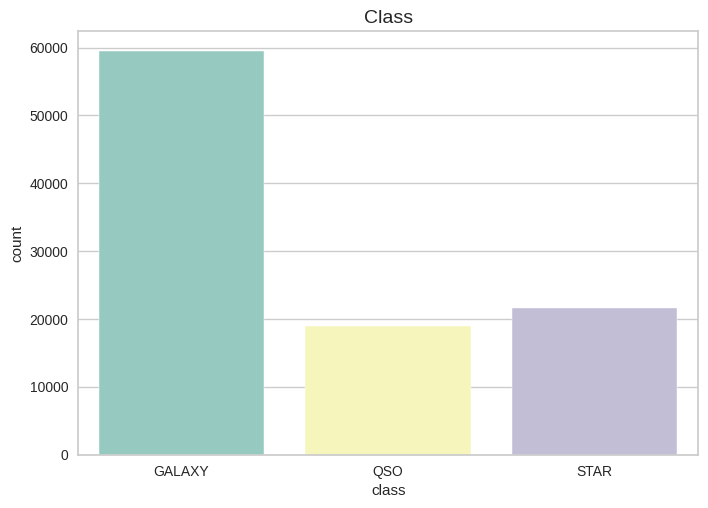

In [ ]:
# memplot jumlah setiap kategori kelas
sns.countplot(x = df["class"], palette="Set3")
plt.title("Class",fontsize=14)
plt.show()

In [ ]:
fig = ex.pie(df,names='class',title='Persentase Kelas',hole=0.33)
fig.show(renderer="colab")

In [ ]:
# mengubah kategori kelas menjadi 0, 1, dan 2
label_encoder = LabelEncoder()
df['class']= label_encoder.fit_transform(df['class'])
df["class"] = df["class"].astype(int)

In [ ]:
# menghitung jumlah setiap kategori kelas
df['class'].value_counts()

#0-GALAXY    59445
#2-STAR      21594
#1-QSO       18961

0    59445
2    21594
1    18961
Name: class, dtype: int64

In [ ]:
# menghitung korelasi antar kolom pada data
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Perason Correlation',  'Spearman Correlation'))
colorscale=     [[1.0              , "rgb(165,0,38)"],
                [0.8888888888888888, "rgb(215,48,39)"],
                [0.7777777777777778, "rgb(244,109,67)"],
                [0.6666666666666666, "rgb(253,174,97)"],
                [0.5555555555555556, "rgb(254,224,144)"],
                [0.4444444444444444, "rgb(224,243,248)"],
                [0.3333333333333333, "rgb(171,217,233)"],
                [0.2222222222222222, "rgb(116,173,209)"],
                [0.1111111111111111, "rgb(69,117,180)"],
                [0.0               , "rgb(49,54,149)"]]

s_val = df.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=0.7,ygap=0.7),
    row=1, col=1
)


s_val = df.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=0.7,ygap=0.7),
    row=2, col=1
)
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)
fig.update_layout(height=700, width=900, title_text="Numeric Correlations")
fig.show(renderer="colab")

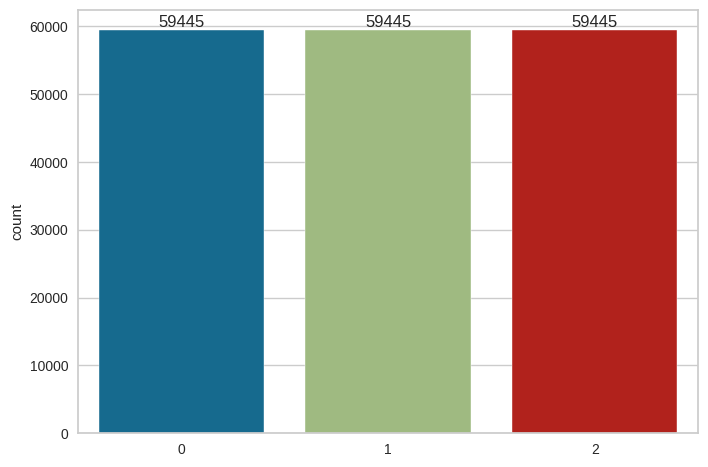

In [ ]:
# Mengatasi data yang tidak seimbang

# tetapkan x and y
x = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values

# menggunakan oversampling dengan SMOTE untuk mengatasi data yang tidak seimbang
sm = SMOTE(random_state=42)
x, y = sm.fit_resample(x, y)

# Plot data yang oversample
ax=sns.countplot(x=y);
ax.bar_label(ax.containers[0]);

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

## Klasifikasi menggunakan SVM

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42) #buat data train dan data tes

# melakukan training menggunakan algoritma svm
svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_clf.fit(x_train,y_train)
# melakukan tes
predicted = svm_clf.predict(x_test)
# membandingkan hasil prediksi dengan data tes dan menghitung akurasinya
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.967


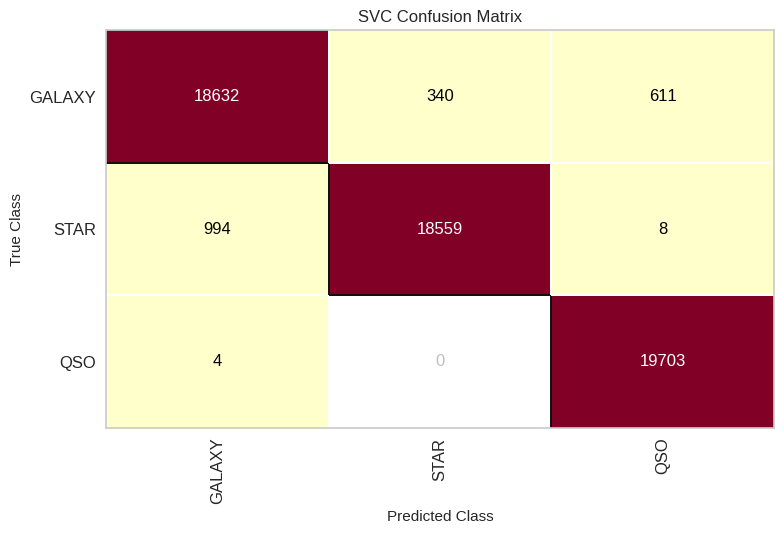

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# memplot confusion matrix
svm_cm = ConfusionMatrix(svm_clf, classes=['GALAXY','STAR','QSO'])

svm_cm.fit(x_train, y_train)
svm_cm.score(x_test, y_test)
svm_cm.show()

In [ ]:
# membandingkan antara data tes dengan data yang diprediksi
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     19583
           1       0.98      0.95      0.97     19561
           2       0.97      1.00      0.98     19707

    accuracy                           0.97     58851
   macro avg       0.97      0.97      0.97     58851
weighted avg       0.97      0.97      0.97     58851



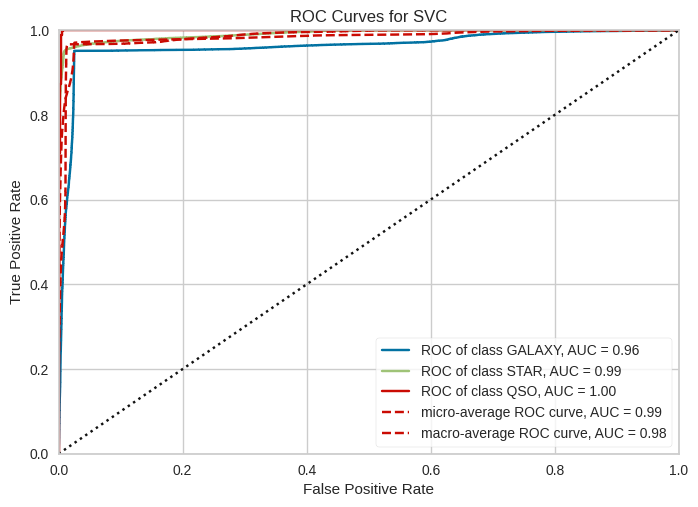

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
# membuat kurva ROC
visualizer = ROCAUC(svm_clf, classes=['GALAXY','STAR','QSO'])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

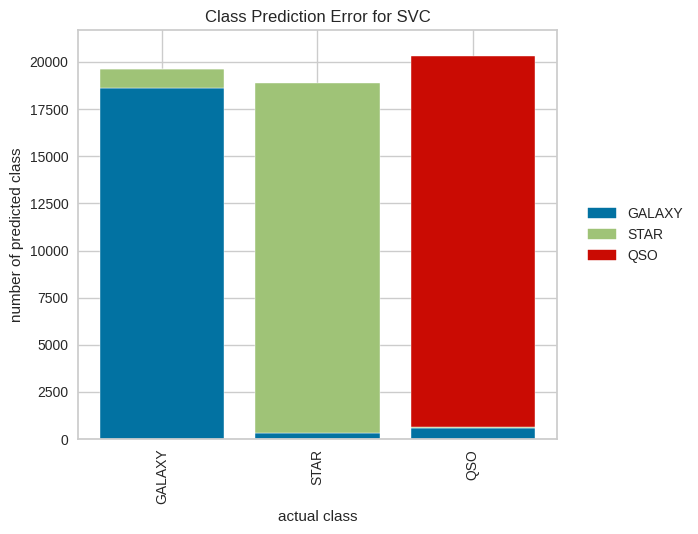

<Axes: title={'center': 'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
# Memplot kesalahan klasifikasi
visualizer = ClassPredictionError(svm_clf, classes=['GALAXY','STAR','QSO'])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

## Klasifikasi menggunakan Random Forest

In [ ]:
# melakukan training menggunakan algoritma random forest
r_forest = RandomForestClassifier()
r_forest.fit(x_train,y_train)
# melakukan tes
predicted = r_forest.predict(x_test)
# membandingkan hasil prediksi dengan data tes dan menghitung akurasinya
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.983


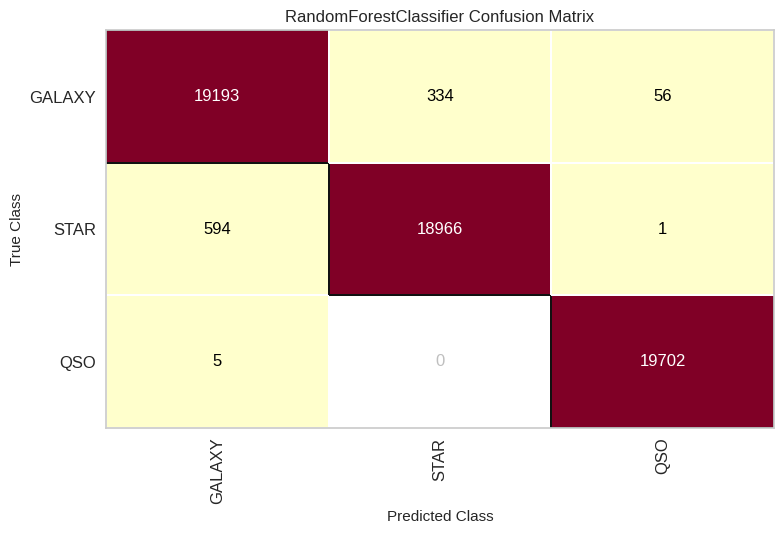

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# membuat confusion matrix
r_forest_cm = ConfusionMatrix(r_forest, classes=['GALAXY','STAR','QSO'])

r_forest_cm.fit(x_train, y_train)
r_forest_cm.score(x_test, y_test)
r_forest_cm.show()

In [ ]:
print(classification_report(y_test, predicted)) # membandingkan antara data tes dengan data yang diprediksi

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     19583
           1       0.98      0.97      0.98     19561
           2       1.00      1.00      1.00     19707

    accuracy                           0.98     58851
   macro avg       0.98      0.98      0.98     58851
weighted avg       0.98      0.98      0.98     58851



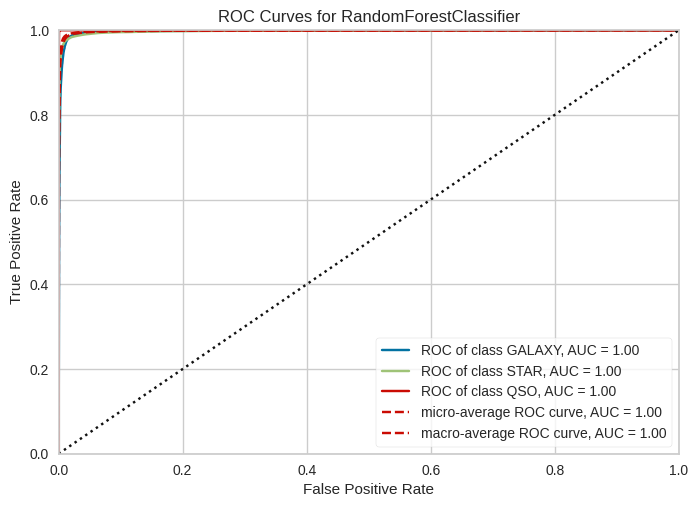

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
# membuat kurva ROC
visualizer = ROCAUC(r_forest, classes=["GALAXY", "STAR", "QSO"])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

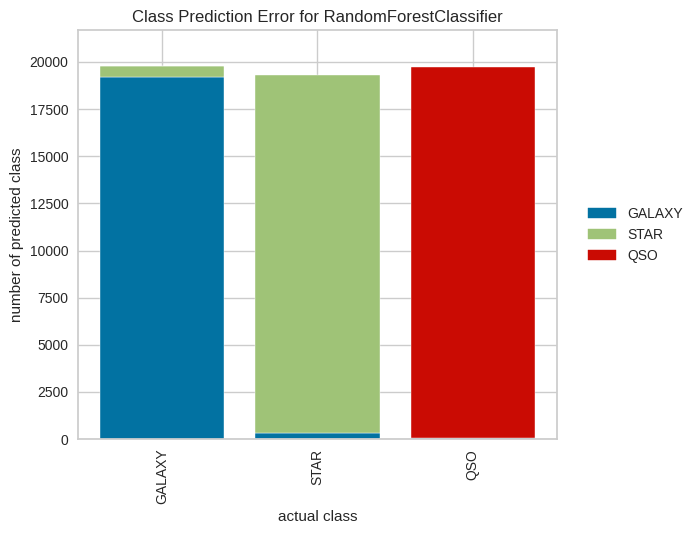

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
# Memplot kesalahan klasifikasi
visualizer = ClassPredictionError(r_forest, classes=["GALAXY", "STAR", "QSO"])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

## Klasifikasi menggunakan KNN

In [ ]:
# melakukan training menggunakan algoritma KNN
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
# melakukan tes
predicted = knn.predict(x_test)
# membandingkan hasil prediksi dengan data tes dan menghitung akurasinya
score = knn.score(x_test, y_test)
knn_score_ = np.mean(score)

print('Accuracy : %.3f' % (knn_score_))

Accuracy : 0.966


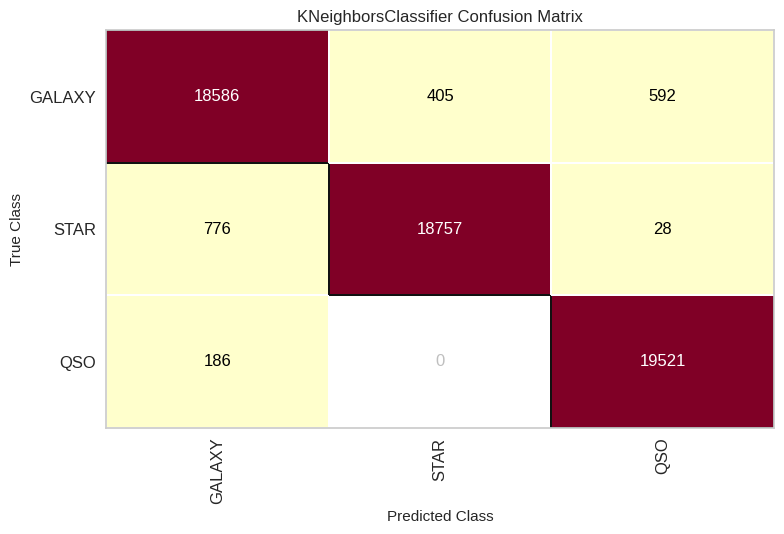

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# membuat confusion matrix
knn_cm = ConfusionMatrix(knn, classes=['GALAXY','STAR','QSO'])

knn_cm.fit(x_train, y_train)
knn_cm.score(x_test, y_test)
knn_cm.show()

In [ ]:
print(classification_report(y_test, predicted)) # membandingkan antara data tes dengan data yang diprediksi

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     19583
           1       0.98      0.96      0.97     19561
           2       0.97      0.99      0.98     19707

    accuracy                           0.97     58851
   macro avg       0.97      0.97      0.97     58851
weighted avg       0.97      0.97      0.97     58851



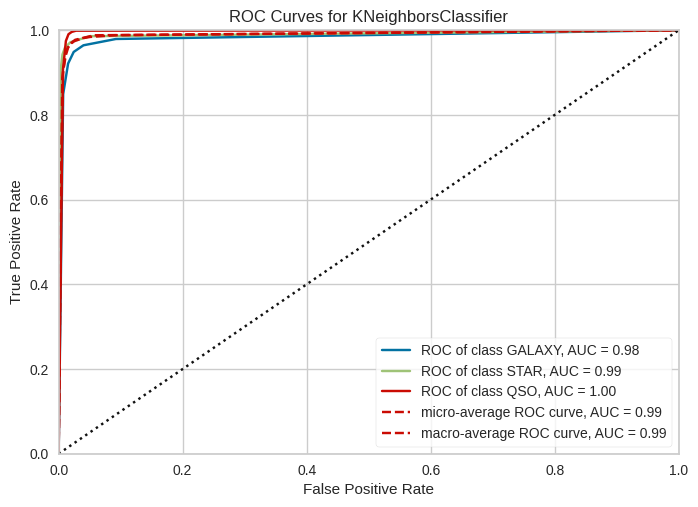

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
# Membuat kurva ROC
visualizer = ROCAUC(knn, classes=["GALAXY", "STAR", "QSO"])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

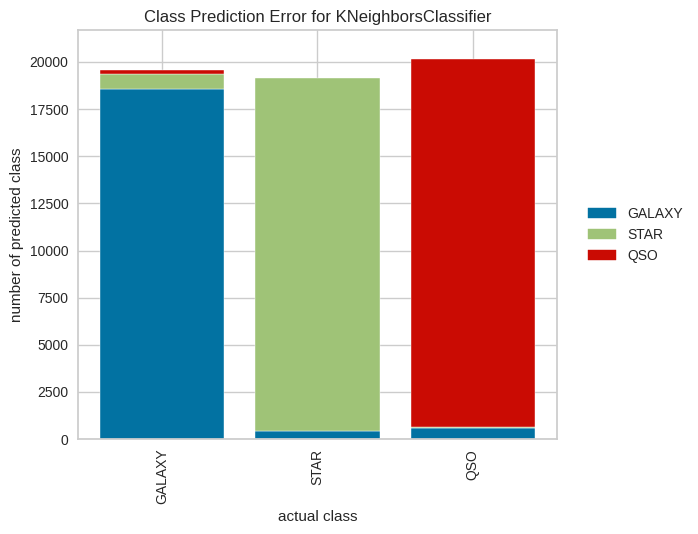

<Axes: title={'center': 'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
# Membuat plot kesalahan klasifikasi
visualizer = ClassPredictionError(knn, classes=["GALAXY", "STAR", "QSO"])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()